In [ ]:
import ast
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

torch version: 2.5.1+cu124
transformers version: 4.47.0.dev0


In [ ]:
################################################
### Load pmid with mesh
################################################
pmids_mesh = pd.read_csv("../data/fig2-3/PubTator3/Pubtator3_BioREX_pmid_mesh.csv")
pmids_mesh["from_mesh"] = pmids_mesh["from_mesh"].apply(ast.literal_eval)

################################################
### Load pmid with bert corr
################################################
pmid_corrs = pd.read_parquet("../data/fig2-3/Repr_diseases_pmid_bert_corrs.parquet")
pmid_corrs["from_mesh"] = pmid_corrs["pmid"].map(pmids_mesh.set_index("pmid")["from_mesh"].to_dict())
display(pmid_corrs.head())
print(pmid_corrs.shape)

Index(['pmid', 'Breast cancer', 'Triple-negative breast cancer',
       'Estrogen receptor-positive breast cancer',
       'Estrogen receptor-negative breast cancer',
       'HER2-positive breast cancer', 'HER2-negative breast cancer',
       'Luminal A breast cancer', 'Luminal B breast cancer', 'Lung cancer',
       'Colorectal cancer', 'Lymphoma', 'Type 2 diabetes'],
      dtype='object')

/tmp/ipykernel_2406226/87283079.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/tmp/ipykernel_2406226/87283079.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Breast\ncancer", "TNBC", "Colorectal\ncancer", "Type2\ndiabetes"], ha="center")
/tmp/ipykernel_2406226/87283079.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/tmp/ipykernel_2406226/87283079.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Breast\ncancer", "TNBC", "Colorectal\ncancer", "Type2\ndiabetes"], ha="cen

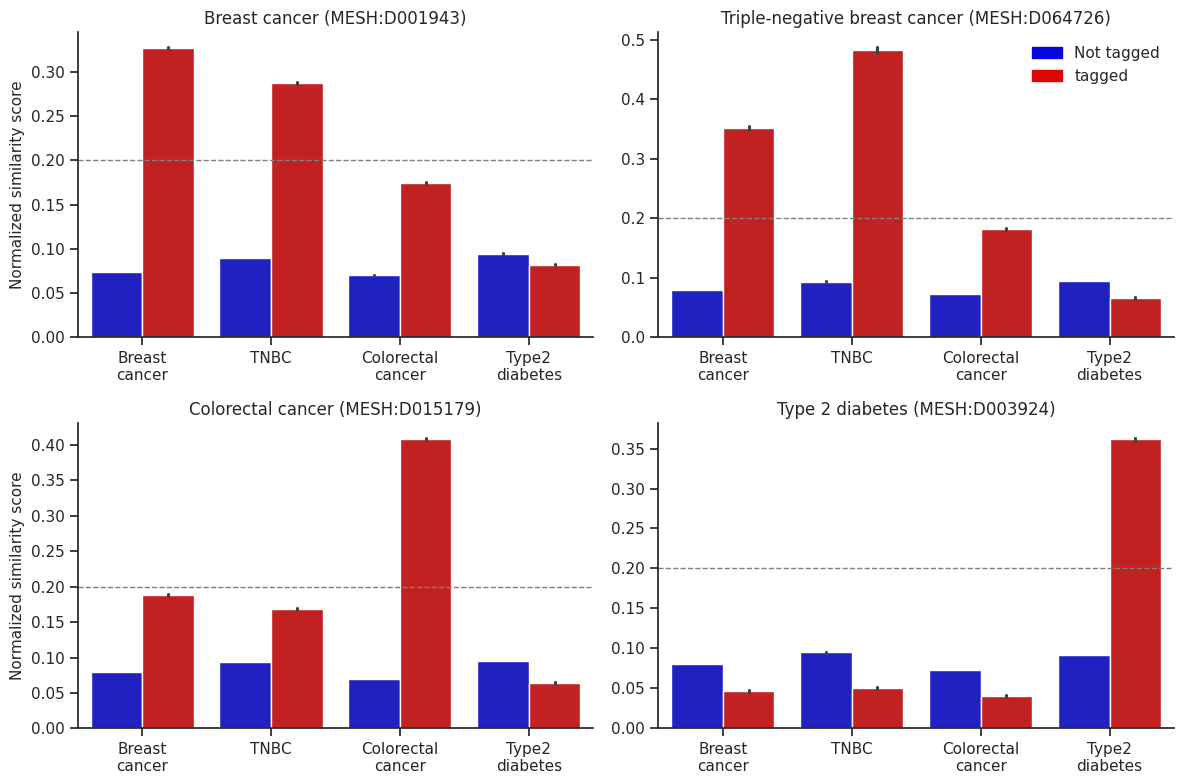

In [ ]:
#################################################
### Plotting
#################################################
mesh_ids = ["MESH:D001943", "MESH:D064726", "MESH:D015179", "MESH:D003924"]
disease_names = ["Breast cancer", "Triple-negative breast cancer", "Colorectal cancer", "Type 2 diabetes"]

fig, axes = plt.subplots(figsize=(12, 8), ncols=2, nrows=2)
axes = axes.flatten()

c1 = sns.dark_palette("blue", n_colors=7, reverse=False)[-2]
c2 = sns.dark_palette("red", n_colors=7, reverse=False)[-2]

handles = [
    mpatches.Patch(color=c1, label="Not tagged"),
    mpatches.Patch(color=c2, label="tagged")
]

for i, (mesh_id, disease_name) in enumerate(zip(mesh_ids, disease_names)):
    plt_df = pmid_corrs.copy()
    plt_df["tag"] = np.where(pmid_corrs["from_mesh"].apply(lambda x: mesh_id in x), "Tagged", "Not tagged")
    
    plt_df = pd.melt(plt_df, id_vars=["tag"], value_vars=disease_names, var_name="disease", value_name="similarity")
    axes[i].set_title(f"{disease_name} ({mesh_id})")
    axes[i].legend()

    sns.barplot(data=plt_df, x="disease", y="similarity", hue="tag", palette=[c1, c2], ax=axes[i])
    if i == 0:
        axes[i].set_ylabel("Normalized similarity score", fontsize=11)
        axes[i].set_xticklabels(["Breast\ncancer", "TNBC", "Colorectal\ncancer", "Type2\ndiabetes"], ha="center")
        axes[i].legend_.remove()
        axes[i].set_xlabel("")
    elif i == 1:
        axes[i].set_ylabel("")
        axes[i].set_xticklabels(["Breast\ncancer", "TNBC", "Colorectal\ncancer", "Type2\ndiabetes"], ha="center")
        axes[i].legend_.remove()
        axes[i].legend(handles=handles, title="", frameon=False, fontsize=11)
        axes[i].set_xlabel("")
    elif i == 2:
        axes[i].set_ylabel("Normalized similarity score", fontsize=11)
        axes[i].set_xticklabels(["Breast\ncancer", "TNBC", "Colorectal\ncancer", "Type2\ndiabetes"], ha="center")
        axes[i].legend_.remove()
        axes[i].set_xlabel("")
    elif i == 3:
        axes[i].set_ylabel("")
        axes[i].set_xticklabels(["Breast\ncancer", "TNBC", "Colorectal\ncancer", "Type2\ndiabetes"], ha="center")
        axes[i].legend_.remove()
        axes[i].set_xlabel("")
    
    axes[i].axhline(y=0.2, color="gray", linestyle="--", linewidth=1)

fig.tight_layout()
fig.savefig("../figures/fig2.representative_disease_corrs_barpng", bbox_inches="tight", dpi=300)
plt.show()